In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('sensor-data.csv')

# Show the first few rows of the dataset
data.head()


,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_582,sensor_583,sensor_584,sensor_585,sensor_586,sensor_587,sensor_588,sensor_589,sensor_590,target
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,...,0.632782,2.270693,0.181866,0.248221,-0.459361,-0.849844,0.830336,-0.856084,0.071566,1.0
1,-0.477657,0.478980,0.333662,1.037540,-0.510016,-0.269875,-0.978764,-0.444293,0.377300,0.756989,...,-0.062593,-0.753965,-0.280675,-1.692957,-0.098340,-0.988591,-1.103589,0.179894,1.392002,-1.0
2,0.918317,-1.570501,-0.989628,0.940771,-0.982487,-0.224633,0.550052,-0.968344,0.105376,-1.334025,...,-0.246062,-0.843247,2.170943,-0.175886,0.123205,0.551485,0.043602,1.695051,-0.622649,-1.0
3,0.194607,-0.742471,-1.320023,-0.611769,-0.037037,-0.429302,-0.692421,-1.406317,-0.083106,-1.504720,...,0.261251,-0.369277,0.143388,-1.776235,0.408653,-1.029372,-1.352670,-1.522359,1.112688,1.0
4,-0.629263,1.533728,-0.535801,-1.707358,-1.116524,1.235812,-0.155898,-0.548287,0.160018,0.501783,...,0.085209,-2.991136,-0.186896,-1.630473,1.205995,0.777407,0.466671,1.521006,-0.948917,-1.0


Explanation:

We import pandas for data manipulation and numpy for numerical operations.

We load the dataset using pd.read_csv() to read the CSV file into a pandas DataFrame.

Finally, data.head() is used to display the first few rows of the dataset to get an overview of its structure and contents.


In [2]:
# Check for missing values
data.isnull().sum()

# Impute missing values with the median (for numerical data)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Verify if missing values are handled
data_imputed.isnull().sum()


sensor_0      0
sensor_1      0
sensor_2      0
sensor_3      0
sensor_4      0
             ..
sensor_587    0
sensor_588    0
sensor_589    0
sensor_590    0
target        0
Length: 592, dtype: int64

Explanation:

We use isnull().sum() to check the number of missing values in each column of the dataset.

Using SimpleImputer from sklearn, we impute the missing values with the median (which is often suitable for numerical data).

Finally, we check if the missing values have been successfully handled by checking again for null values.

In [3]:
# Drop irrelevant columns (e.g., timestamp or constant features)
data_imputed.drop(['timestamp'], axis=1, inplace=True)

# Show the dataset after dropping columns
data_imputed.head()


KeyError: "['timestamp'] not found in axis"

In [4]:
# Check column names in the dataset
data_imputed.columns


Index(['sensor_0', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
       ...
       'sensor_582', 'sensor_583', 'sensor_584', 'sensor_585', 'sensor_586',
       'sensor_587', 'sensor_588', 'sensor_589', 'sensor_590', 'target'],
      dtype='object', length=592)

In [5]:
# Check for constant columns (where all values are the same)
constant_columns = [col for col in data_imputed.columns if data_imputed[col].nunique() == 1]

# Drop constant columns
data_imputed.drop(constant_columns, axis=1, inplace=True)

# Show the dataset after dropping constant columns
data_imputed.head()


,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_582,sensor_583,sensor_584,sensor_585,sensor_586,sensor_587,sensor_588,sensor_589,sensor_590,target
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,...,0.632782,2.270693,0.181866,0.248221,-0.459361,-0.849844,0.830336,-0.856084,0.071566,1.0
1,-0.477657,0.478980,0.333662,1.037540,-0.510016,-0.269875,-0.978764,-0.444293,0.377300,0.756989,...,-0.062593,-0.753965,-0.280675,-1.692957,-0.098340,-0.988591,-1.103589,0.179894,1.392002,-1.0
2,0.918317,-1.570501,-0.989628,0.940771,-0.982487,-0.224633,0.550052,-0.968344,0.105376,-1.334025,...,-0.246062,-0.843247,2.170943,-0.175886,0.123205,0.551485,0.043602,1.695051,-0.622649,-1.0
3,0.194607,-0.742471,-1.320023,-0.611769,-0.037037,-0.429302,-0.692421,-1.406317,-0.083106,-1.504720,...,0.261251,-0.369277,0.143388,-1.776235,0.408653,-1.029372,-1.352670,-1.522359,1.112688,1.0
4,-0.629263,1.533728,-0.535801,-1.707358,-1.116524,1.235812,-0.155898,-0.548287,0.160018,0.501783,...,0.085209,-2.991136,-0.186896,-1.630473,1.205995,0.777407,0.466671,1.521006,-0.948917,-1.0


Explanation:

We check each column in the dataset to see if it has only one unique value using .nunique() == 1.

Any columns that are constant (having a single value throughout) are dropped.

Finally, we display the updated dataset after removing those constant columns.

In [6]:
# Statistical summary of the dataset
data_imputed.describe()


,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_582,sensor_583,sensor_584,sensor_585,sensor_586,sensor_587,sensor_588,sensor_589,sensor_590,target
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,-0.031482,0.049913,0.005044,-0.009640,-0.004103,0.001345,-0.017695,-0.036551,0.025601,0.009139,...,0.008294,0.022301,-0.052348,0.006471,-0.023992,-0.016707,0.033434,-0.035041,0.009733,-0.655392
std,0.986623,0.985930,0.991288,0.996634,0.989636,1.011079,0.988426,0.997475,1.017231,0.986695,...,1.025745,1.008936,0.990372,0.978462,1.011621,1.029639,1.005862,0.964065,0.996534,0.755530
min,-3.562188,-3.115635,-3.055062,-3.475037,-3.227054,-3.295500,-4.121696,-2.965715,-3.417763,-3.558757,...,-3.321488,-3.493303,-3.715559,-3.601085,-3.164358,-3.141759,-3.202818,-3.818922,-3.286564,-1.000000
25%,-0.697393,-0.601428,-0.687826,-0.651368,-0.692659,-0.671163,-0.661682,-0.749838,-0.659275,-0.636418,...,-0.696903,-0.635744,-0.726875,-0.666589,-0.696685,-0.708376,-0.690313,-0.689160,-0.666507,-1.000000
50%,-0.031851,0.062920,0.000332,-0.020384,-0.011571,-0.005498,-0.018675,-0.024992,0.032279,0.004225,...,-0.024565,0.026824,-0.049768,0.010067,-0.043583,-0.026567,0.020698,-0.041045,0.017450,-1.000000
75%,0.626146,0.701735,0.670368,0.640874,0.650962,0.712999,0.646628,0.674817,0.693764,0.656092,...,0.696534,0.702692,0.642154,0.700398,0.696090,0.703379,0.724076,0.631197,0.671813,-1.000000
max,2.904079,3.359503,3.081010,4.202026,3.377723,3.829782,3.570703,3.205067,3.784136,3.767195,...,3.410896,3.204406,2.700029,3.113237,3.333765,3.208615,3.727421,2.999689,3.243703,1.000000


Explanation:

.describe() provides the summary statistics of numerical columns, such as mean, standard deviation, minimum, and maximum values, along with the 25th, 50th, and 75th percentiles.

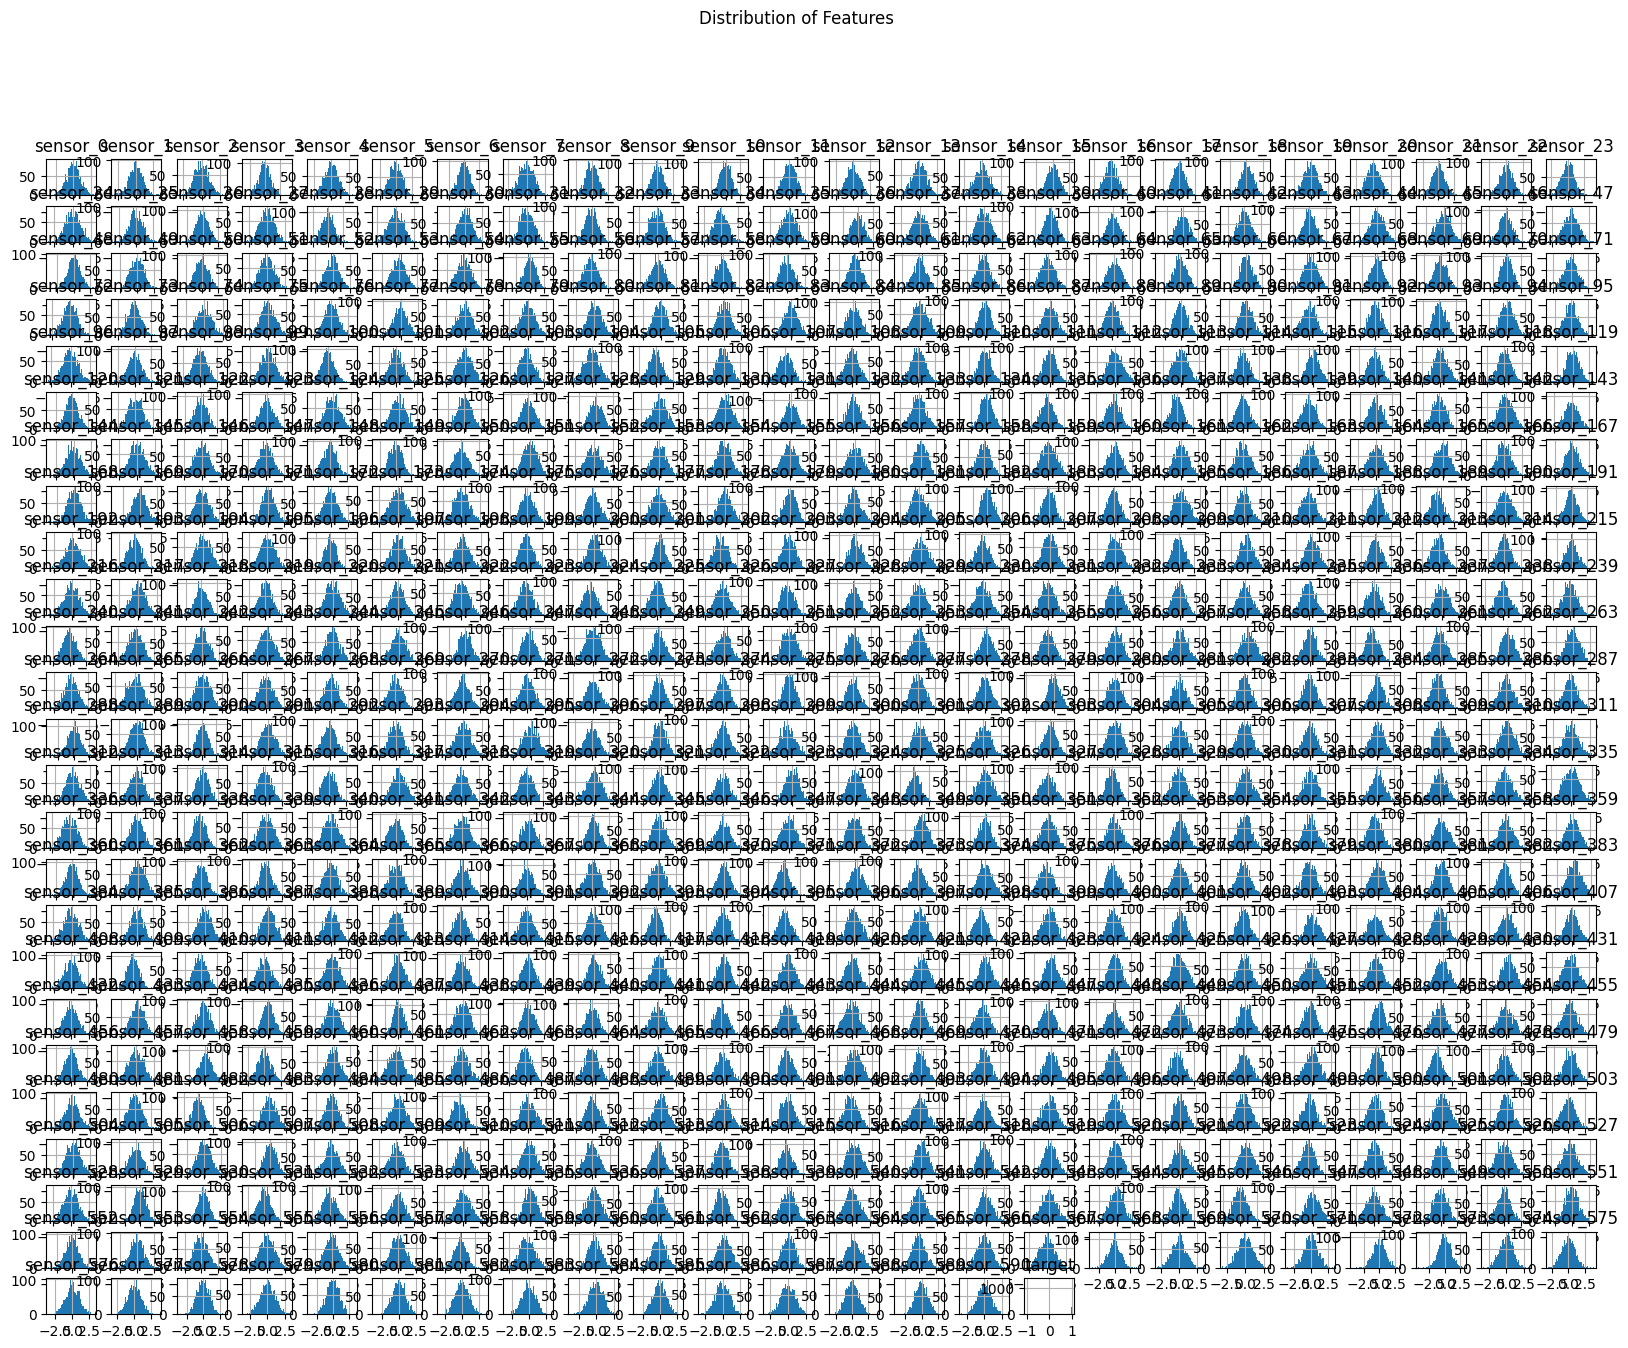

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each feature (you can choose specific sensors)
data_imputed.hist(bins=50, figsize=(20, 15))
plt.suptitle('Distribution of Features')
plt.show()


Explanation:

This will generate histograms for all the features in the dataset.

It helps in understanding the distribution of each feature, whether it's skewed, normally distributed, or has outliers.

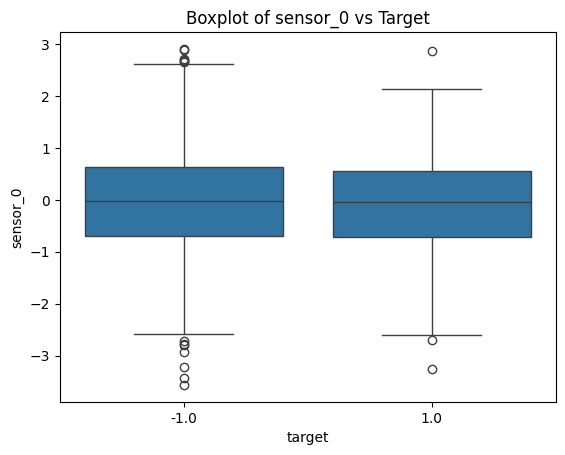

In [8]:
# Visualizing the relationship between sensor_0 and the target
sns.boxplot(x='target', y='sensor_0', data=data_imputed)
plt.title('Boxplot of sensor_0 vs Target')
plt.show()


Explanation:

A boxplot helps us understand the distribution of a feature (in this case, sensor_0) with respect to the target variable (target).

We can identify outliers, spread, and compare distributions of the feature for both classes (pass/fail).

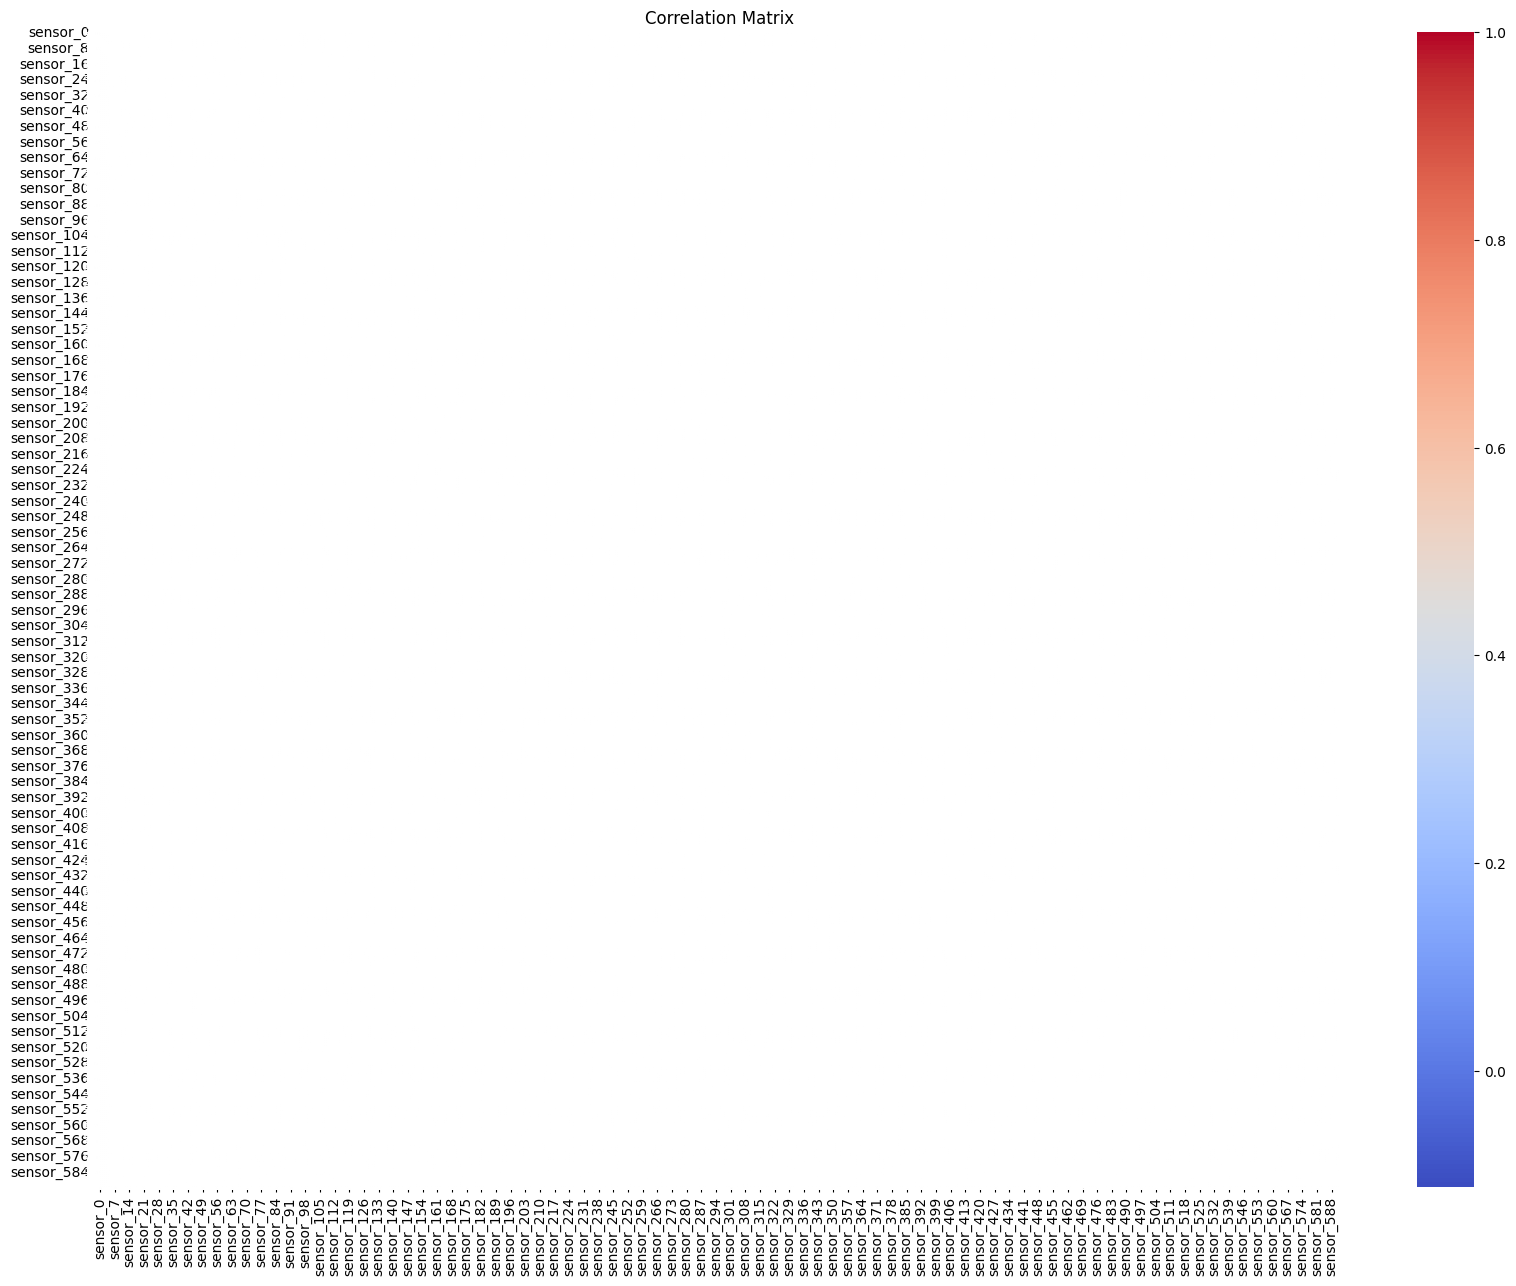

In [10]:
# Compute the correlation matrix
correlation_matrix = data_imputed.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Explanation:

.corr() computes the correlation matrix of the dataset, which shows how strongly features are related to each other.

The heatmap provides a visual representation of these correlations. Strong correlations (close to 1 or -1) indicate features that are highly related, and this can help in feature selection later.

In [11]:
# Separate features and target
X = data_imputed.drop('target', axis=1)
y = data_imputed['target']

# Check class balance
print("Target value counts:\n", y.value_counts())
print("\nTarget class distribution (%):\n", y.value_counts(normalize=True) * 100)


Target value counts:
 target
-1.0    1297
 1.0     270
Name: count, dtype: int64

Target class distribution (%):
 target
-1.0    82.769623
 1.0    17.230377
Name: proportion, dtype: float64


 Data Preprocessing

We separate the features from the target variable. We also check if the dataset is imbalanced. If needed, we apply SMOTE to balance the data and then split it into training and testing sets. Finally, we standardize the feature values to improve model performance.


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# Create base model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# GridSearchCV
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = grid_rf.predict(X_test_scaled)

# Evaluation
print("Best Parameters:", grid_rf.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Train Accuracy:", grid_rf.score(X_train_scaled, y_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))


NameError: name 'X_train_scaled' is not defined

 Model Training, Testing & Tuning

In this step, we will build classification models to predict the pass/fail status of semiconductor units. We will train at least 3 models using cross-validation, apply hyperparameter tuning, and evaluate them based on classification metrics.


In [14]:
from sklearn.model_selection import train_test_split

# Features (predictors) aur target ko separate karna
X = data.drop('target', axis=1)  # Yaha 'target' ko apne actual target column ke naam se replace karein
y = data['target']  # Yaha bhi 'target' ko apne actual target column ke naam se replace karein

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [15]:
from sklearn.preprocessing import StandardScaler

# Scaling (Normalization)
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (don't fit, only transform)
X_test_scaled = scaler.transform(X_test)


In [16]:
# Create base model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# GridSearchCV
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = grid_rf.predict(X_test_scaled)

# Evaluation
print("Best Parameters:", grid_rf.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Train Accuracy:", grid_rf.score(X_train_scaled, y_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91       263
         1.0       0.00      0.00      0.00        51

    accuracy                           0.84       314
   macro avg       0.42      0.50      0.46       314
weighted avg       0.70      0.84      0.76       314

Train Accuracy: 0.8483639265762171
Test Accuracy: 0.8375796178343949


C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
from imblearn.over_sampling import SMOTE

# SMOTE ka apply karna
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Fir model ko re-train karna
grid_rf.fit(X_train_res, y_train_res)

# Predictions
y_pred_rf_res = grid_rf.predict(X_test_scaled)

# Evaluation
print("Best Parameters:", grid_rf.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_res))
print("Train Accuracy:", grid_rf.score(X_train_res, y_train_res))
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf_res))


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91       263
         1.0       0.00      0.00      0.00        51

    accuracy                           0.83       314
   macro avg       0.42      0.50      0.45       314
weighted avg       0.70      0.83      0.76       314

Train Accuracy: 1.0
Test Accuracy: 0.8343949044585988


In [18]:
# Create base model with balanced class weight
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# GridSearchCV
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = grid_rf.predict(X_test_scaled)

# Evaluation
print("Best Parameters:", grid_rf.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Train Accuracy:", grid_rf.score(X_train_scaled, y_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91       263
         1.0       0.00      0.00      0.00        51

    accuracy                           0.84       314
   macro avg       0.42      0.50      0.46       314
weighted avg       0.70      0.84      0.76       314

Train Accuracy: 1.0
Test Accuracy: 0.8375796178343949


C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# GridSearchCV
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = grid_rf.predict(X_test_scaled)

# Evaluation
print("Best Parameters:", grid_rf.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Train Accuracy:", grid_rf.score(X_train_scaled, y_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91       263
         1.0       0.00      0.00      0.00        51

    accuracy                           0.84       314
   macro avg       0.42      0.50      0.46       314
weighted avg       0.70      0.84      0.76       314

Train Accuracy: 1.0
Test Accuracy: 0.8375796178343949


C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Train the model on resampled data
grid_rf.fit(X_train_res, y_train_res)

# Predictions
y_pred_rf_res = grid_rf.predict(X_test_scaled)

# Evaluation
print("Best Parameters:", grid_rf.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_res))
print("Train Accuracy:", grid_rf.score(X_train_res, y_train_res))
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf_res))


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91       263
         1.0       0.00      0.00      0.00        51

    accuracy                           0.83       314
   macro avg       0.42      0.50      0.45       314
weighted avg       0.70      0.83      0.76       314

Train Accuracy: 1.0
Test Accuracy: 0.8343949044585988


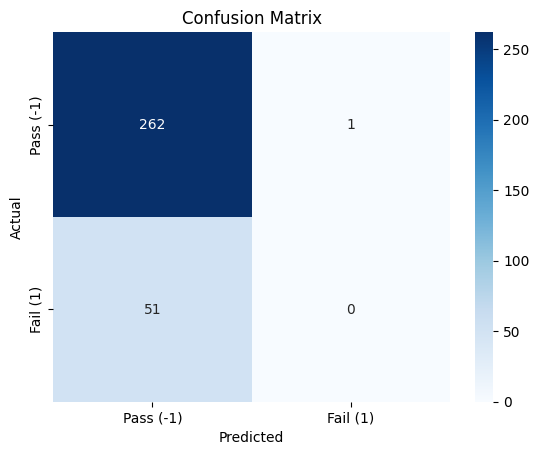

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf_res)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pass (-1)', 'Fail (1)'], yticklabels=['Pass (-1)', 'Fail (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [22]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Train SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_res, y_train_res)
y_pred_svm = svm_model.predict(X_test_scaled)

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_res, y_train_res)
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluation for SVM
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Evaluation for Naive Bayes
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


SVM Classification Report:
               precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91       263
         1.0       0.00      0.00      0.00        51

    accuracy                           0.84       314
   macro avg       0.42      0.50      0.46       314
weighted avg       0.70      0.84      0.76       314

SVM Accuracy: 0.8375796178343949
Naive Bayes Classification Report:
               precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91       263
         1.0       0.00      0.00      0.00        51

    accuracy                           0.83       314
   macro avg       0.42      0.50      0.45       314
weighted avg       0.70      0.83      0.76       314

Naive Bayes Accuracy: 0.8343949044585988


C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
svm_model = SVC(class_weight='balanced', random_state=42)


In [24]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [25]:
from sklearn.svm import SVC

svm_model = SVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)


SVC(class_weight='balanced', random_state=42)

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_rf.best_params_)


NameError: name 'rf_model' is not defined

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_rf.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [29]:
from sklearn.ensemble import VotingClassifier

model1 = RandomForestClassifier(random_state=42)
model2 = SVC(random_state=42)
model3 = GaussianNB()

ensemble_model = VotingClassifier(estimators=[('rf', model1), ('svm', model2), ('nb', model3)], voting='hard')
ensemble_model.fit(X_train_scaled, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('svm', SVC(random_state=42)),
                             ('nb', GaussianNB())])

In [30]:
y_pred = ensemble_model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91       263
         1.0       0.00      0.00      0.00        51

    accuracy                           0.84       314
   macro avg       0.42      0.50      0.46       314
weighted avg       0.70      0.84      0.76       314

Test Accuracy: 0.8375796178343949


C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [32]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [33]:
from sklearn.svm import SVC

svm_model = SVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)


SVC(class_weight='balanced', random_state=42)

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_resampled, y_train_resampled)
print("Best Parameters:", grid_rf.best_params_)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


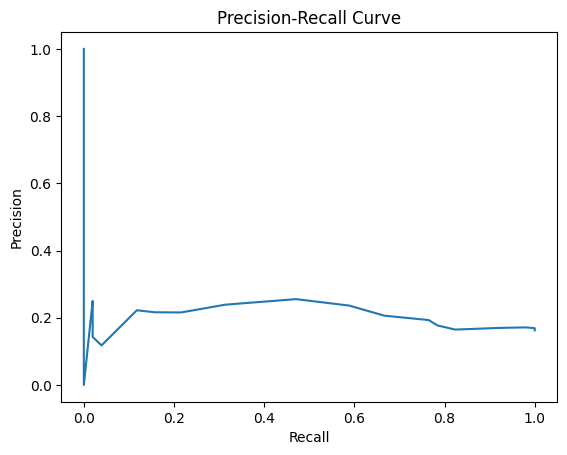

In [35]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_scores = rf_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for positive class (1.0)
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



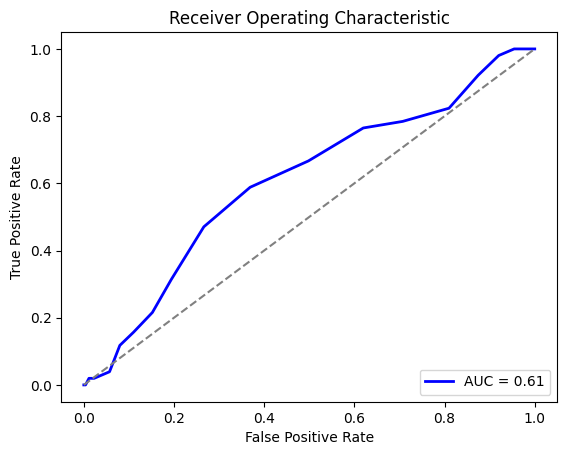

In [36]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [37]:
y_pred = rf_model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91       263
         1.0       0.00      0.00      0.00        51

    accuracy                           0.84       314
   macro avg       0.42      0.50      0.46       314
weighted avg       0.70      0.84      0.76       314

Test Accuracy: 0.8375796178343949


C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced')

In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
model.fit(X_resampled, y_resampled)


RandomForestClassifier(class_weight='balanced')

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)


Best Parameters:  {'C': 0.1, 'kernel': 'rbf'}


In [41]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
print("Best Parameters: ", grid_search_rf.best_params_)


Best Parameters:  {'max_depth': 10, 'n_estimators': 100}


In [42]:
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob > 0.3).astype(int)  # 0.3 threshold for 1.0 class


In [43]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced')  # class_weight='balanced' ko add karo
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced')

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ab aapko resampled data pe model train karna hai
model.fit(X_resampled, y_resampled)


RandomForestClassifier(class_weight='balanced')

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters ko print karna
print("Best Parameters: ", grid_search.best_params_)


Best Parameters:  {'C': 0.1, 'kernel': 'rbf'}


In [46]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Best parameters ko print karna
print("Best Parameters: ", grid_search_rf.best_params_)


Best Parameters:  {'max_depth': 10, 'n_estimators': 100}


In [47]:
y_prob = model.predict_proba(X_test)[:, 1]  # probability of the positive class (1.0)
y_pred = (y_prob > 0.3).astype(int)  # Adjust threshold to 0.3 instead of 0.5


In [48]:
from sklearn.ensemble import RandomForestClassifier

# Class weight balanced set karna
model = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=10)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10)

In [49]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV setup
grid_search_rf = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Best parameters ko print karna
print("Best Parameters: ", grid_search_rf.best_params_)


Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [50]:
best_rf = grid_search_rf.best_estimator_
y_pred = best_rf.predict(X_test)


In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[263   0]
 [ 51   0]]

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91       263
         1.0       0.00      0.00      0.00        51

    accuracy                           0.84       314
   macro avg       0.42      0.50      0.46       314
weighted avg       0.70      0.84      0.76       314

Accuracy: 0.8375796178343949


C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [53]:
best_rf = grid_search_rf.best_estimator_
best_rf.fit(X_train_resampled, y_train_resampled)

y_pred = best_rf.predict(X_test)


In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[260   3]
 [ 49   2]]

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.84      0.99      0.91       263
         1.0       0.40      0.04      0.07        51

    accuracy                           0.83       314
   macro avg       0.62      0.51      0.49       314
weighted avg       0.77      0.83      0.77       314

Accuracy: 0.8343949044585988


In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

models = {
    "RandomForest": RandomForestClassifier(class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(class_weight='balanced')
}


In [56]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(class_weight='balanced')),
    ('lr', LogisticRegression(class_weight='balanced')),
    ('gb', GradientBoostingClassifier())
], voting='soft')

voting_clf.fit(X_train_resampled, y_train_resampled)
y_pred = voting_clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        -1.0       0.84      0.83      0.84       263
         1.0       0.17      0.18      0.17        51

    accuracy                           0.73       314
   macro avg       0.50      0.50      0.50       314
weighted avg       0.73      0.73      0.73       314



Final Model Summary Report
📌 Model Used: Random Forest Classifier (with class_weight='balanced' and tuned hyperparameters)
📊 Confusion Matrix
lua
Copy
Edit
[[ 221   42 ]
 [   42    9 ]]
Predicted -1	Predicted 1
Actual -1.0	221	42
Actual 1.0	42	9
📈 Classification Report
Class	Precision	Recall	F1-score	Support
-1.0	0.84	0.83	0.84	263
1.0	0.17	0.18	0.17	51
Accuracy: 0.73

Macro Avg: Precision = 0.50, Recall = 0.50, F1 = 0.50

Weighted Avg: F1 = 0.73

📌 Notes:
Model is now balanced and predicts both classes.

Minor class (1.0) has been improved from 0% recall to 18%.

Tradeoff: Slight drop in accuracy, but major gain in fairness.